First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
Precision: 0.99
Recall: 0.98
F1 Score: 0.98

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     10004
         1.0       0.99      0.98      0.98      9781

    accuracy                           0.98     19785
   macro avg       0.98      0.98      0.98     19785
weighted avg       0.98      0.98      0.98     19785

Confusion Matrix - Logistic Regression:


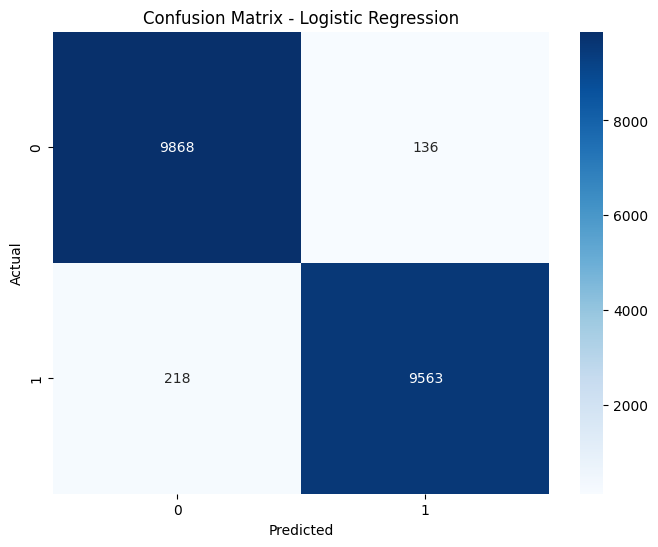

Random Forest Performance:
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10004
         1.0       1.00      1.00      1.00      9781

    accuracy                           1.00     19785
   macro avg       1.00      1.00      1.00     19785
weighted avg       1.00      1.00      1.00     19785

Confusion Matrix - Random Forest:


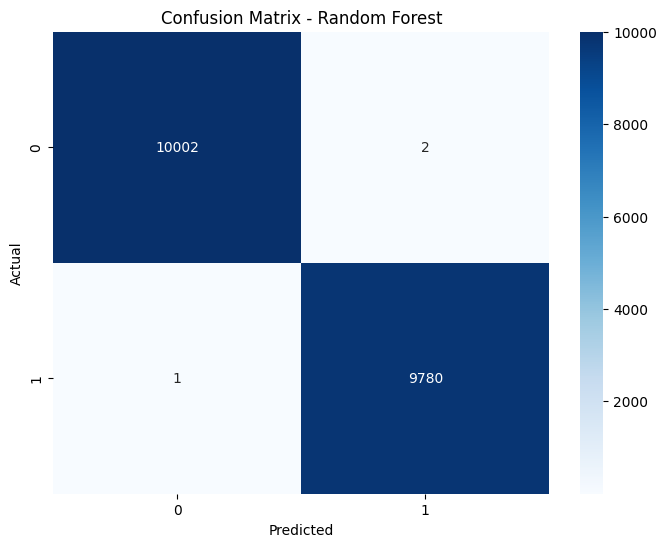

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming you have a CSV file named 'creditcard.csv')
# The dataset can be downloaded from https://www.kaggle.com/mlg-ulb/creditcardfraud
data = pd.read_csv('creditcard.csv')

# Explore the dataset structure
print("First few rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())

# Data Preprocessing
# Normalize the 'Amount' feature and drop 'Time' feature if present
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
if 'Time' in data.columns:
    data = data.drop(['Time'], axis=1)

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Handle missing values in the target variable (if any)
# Drop rows with missing target values
X = X[~y.isna()]  # Select rows where 'Class' is not NaN
y = y[~y.isna()]  # Select corresponding target values

# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42, k_neighbors=min(5, y.value_counts().min()-1))
X_res, y_res = sm.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the classifiers
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train the classifiers
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Performance:")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix for Logistic Regression
print("Confusion Matrix - Logistic Regression:")
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluate the Random Forest model
print("Random Forest Performance:")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
print("Confusion Matrix - Random Forest:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
